**Black-Scholes e Discretização de Euler**

Neste exercicio computacional, irei utilizar os modelos de Black-Scholes e discretização de Euler para precificar a opção de compra da ação da Petrobras (PETR4).

In [14]:
# Upload bibliotecas

import pandas as pd
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt 
%matplotlib inline

A fórmula de Black-Scholes é dada da seguinte forma:

$$\ d_1 = \frac{ln(\frac{S}{K})+(r+\frac{\sigma^2}{2})\cdot t}{s \cdot \sqrt{t}}$$

\

$$ d_2=d_1-s\cdot  \sqrt{t}=\frac{ln(\frac{S}{K})+(r-\frac{\sigma^2}{2})\cdot t}{s \cdot \sqrt{t}}$$

onde S é o preço da ação, K o preço vigente, r a taxa livre de risco, $\sigma^2$ o desvio-padrão da ação e T o intervalo em anos.

In [2]:
# Definição dos parametros d1 e d2

def d1(S,K, r, sigma, T):
    return (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))

def d2(S,K,r, sigma, T):
    return (np.log(S/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))


In [3]:
# Definição da função Black-Scholes

def BS(S,K,r, sigma,T):
  return(S*norm.cdf(d1(S,K,r, sigma,T)))-(K*np.exp(-r*T)*norm.cdf(d2(S,K,r,sigma,T)))

In [4]:
# Upload da ação no yf

petr = 'PETR4.SA'
data=pd.DataFrame()
data[petr]=wb.DataReader(petr, data_source='yahoo', start='2009-01-01')['Adj Close']

In [6]:
# Preço atual da ação

S=data.iloc[-1]
S

PETR4.SA    26.469999
Name: 2022-11-18 00:00:00, dtype: float64

In [8]:
# Desvio-Padrão dos retornos logaritimicos

log_ret=np.log(1+data.pct_change())

sigma=log_ret.std()*250**0.5

In [9]:
# Taxa livre de risco (Selic nov/22), preço de exercicio e intervalo de tempo

r=0.1375
K=28
T=1

In [11]:
# Calculo de d1

d1(S,K,r,sigma,T)



PETR4.SA    0.40627
dtype: float64

In [12]:
# Cálculo de d2 

d2(S,K,r, sigma,T)

PETR4.SA   -0.049399
dtype: float64

In [13]:
#Cálculo do preço da opção de compra

BS(S,K,r, sigma, T)

PETR4.SA    5.689302
Name: 2022-11-18 00:00:00, dtype: float64

Logo, de acordo com a fórmula de Black-Scholes o preço da opção de compra é igual a R$ 5.68.

Discretização de Euler

A fórmula que descreve a discretização de Euler é dada da seguinte forma:

$$S_t=S_{t-1} \cdot e^{((r-0.5\sigma^2)\cdot \delta_t+\sigma \cdot \sqrt{\delta_t}\cdot Z_t)}$$

In [27]:
# Taxa livre de risco 

r1=0.1375


In [25]:
#  Desvio padrão retorno logaritimico

sigma1=log_ret.std()*250**0.5
sigma1=sigma.values


In [38]:
# Periodo de previsão a frente

T=1
t_dias=250
delta_t=T/t_dias

In [39]:
#Numero de iterações

i=10000

In [40]:
# Matriz de Componentes Aleatórios

Z=np.random.standard_normal((t_dias+1,i))
S=np.zeros_like(Z)
S0=data.iloc[-1]
S[0]=S0

In [41]:
# Iterações via discretização de Euler

for t in range(1, t_dias+1):
  S[t]=S[t-1]*np.exp((r1-0.5*sigma1**2)*delta_t+sigma1*delta_t**0.5*Z[t])



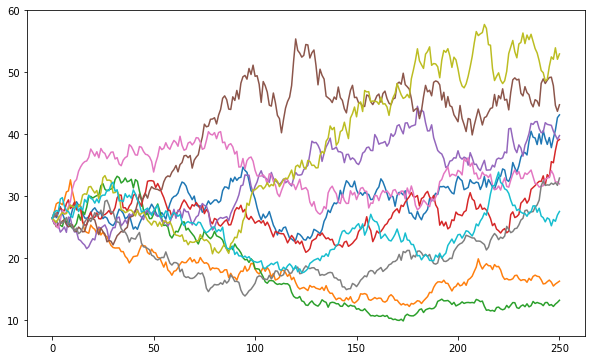

In [43]:
# Visualação gráfica

plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

In [47]:
# Calculo do payoff da opção de compra

payoff=np.maximum(S[-1]-28,0)

C=np.exp(-r*T)*np.sum(payoff)/i

C

5.784662042647719

A diferença do preço de opção de compra entre os metodos de discretização de Euler e Black-Scholes é igual a aproximadamente 5.784-5.689=0.095